In [3]:
import json
import numpy as np
import pandas as  pd
import glob
import matplotlib.pyplot as plt

In [8]:
json_files = glob.glob('../EoDirectoryMissionExport/**.json', recursive=True)


In [44]:
len(json_files)

893

In [67]:
with open(json_files[56], 'r') as f:
  data = json.load(f)

## test on single mission

In [68]:
mission = data['mission']
content = data['content']
chapters = data['chapters']
chapters = [ch.strip() for ch in chapters]

In [69]:
mission

'GSSAP'

In [70]:
chapters

['GSSAP (Geosynchronous Space Situational Awareness Program)',
 'Spacecraft:',
 'Payload:',
 'ANGELS (Automated Navigation and Guidance Experiment for Local Space)',
 'Status of mission:']

In [71]:
chapter_idx = []
for k,line in enumerate(content):
    if any(line[:-5] in ch for ch in chapters):
        chapter_idx.append(k)
        print(line)


GSSAP (Geosynchronous Space Situational Awareness Program)
Spacecraft:
Payload:
ANGELS (Automated Navigation and Guidance Experiment for Local Space)
Status of mission:


In [72]:
len(chapter_idx), len(chapters)

(5, 5)

In [73]:
chapter_idx

[0, 6, 14, 16, 19]

In [82]:
chapter_content = []
for i in range(len(chapter_idx)-1):
    chapter_content.append('\n'.join(content[chapter_idx[i]+1:chapter_idx[i+1]])+ f'\nSOURCE: {mission} chapter {content[chapter_idx[i]]}')
chapter_content.append(content[chapter_idx[-1]+1:])

In [83]:
chapter_content[1]

'The two GSSAP spacecraft were built by Orbital ATK of Dulles, VA, as prime contractor. Exact details on the satellites and their payloads have not been provided.\nWith a mass estimated on the order of 650 to 700kg, each GSSAP satellite likely carries a significant amount of propellant, most likely using a hydrazine monopropellant propulsion system to make frequent orbit adjustments and perform stationkeeping maneuvers when operational requirements call for the satellite to drift to or stay at a new location. Small impulse burns will set the satellite up to observe chosen targets by setting up favorable passes below or above the satellite of interest at a low relative speed.\nPower generation is accomplished using two deployable solar arrays while a high-rate communications system provides the secure downlink of acquired SSA sensor data.\nIt can be expected that one GSSAP satellite operates in a drift orbit above GEO while the other orbits below the GEO altitude.\nLaunch: The GSSAP-1 a

## process all jsons

In [84]:
json_files = glob.glob('../EoDirectoryMissionExport/**.json', recursive=True)


In [ ]:
chapter_content = []
c=0
cc=0

for jf in json_files[:1000]:
  with open(jf, 'r') as f:
    data = json.load(f)

    mission = data['mission']
    content = data['content']
    chapters = data['chapters']
    print(mission)
    chapters = [ch.strip() for ch in chapters if len(ch.strip())>2]

    chapter_idx = []
    for k,line in enumerate(content):
        if any(((line[:-int(len(line)*0.3)] in ch) & (ch[:-int(len(ch)*0.3)] in line)) for ch in chapters):
            chapter_idx.append(k)
    chapter_idx.append(len(content))
            
    # if len(chapter_idx)!=len(chapters):
    #    print(len(chapters),len(chapter_idx))
    #    print(chapters)
    #    print([content[idx] for idx in chapter_idx])
    #    print()
    #    c+=1
    
    # if chapter_idx[0] != 0:
    #    cc=+1


    for i in range(len(chapter_idx)-1):
        paragraph = '\n'.join(content[chapter_idx[i]+1:chapter_idx[i+1]])
        num_tokens = len(bi_encoder.tokenizer.encode(paragraph))
        n_chunks = num_tokens//512+1
        chars_per_chunk = len(paragraph)//n_chunks
        for chunk in range(n_chunks):
           chapter_content.append(paragraph[chunk*chars_per_chunk:(chunk+1)*chars_per_chunk] + f'\nSOURCE: {mission} chapter {content[chapter_idx[i]]}' )

        #chapter_content.append('\n'.join(content[chapter_idx[i]+1:chapter_idx[i+1]])+ f'\nSOURCE: {mission} chapter {content[chapter_idx[i]]}')
    #chapter_content.append('\n'.join(content[chapter_idx[-1]+1:]))


In [118]:
from sentence_transformers import SentenceTransformer, CrossEncoder, util
import os
import torch
import json

/home/ubuntu/miniconda3/envs/openai/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [119]:
bi_encoder = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')
bi_encoder.max_seq_length = 512     #Truncate long passages to 256 tokens
top_k = 32     

/home/ubuntu/miniconda3/envs/openai/lib/python3.10/site-packages/torch/cuda/__init__.py:88: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [146]:
# for p in chapter_content:
#     try:bi_encoder.tokenizer.encode(p)
#     except: print(p)
t_len = [len(bi_encoder.tokenizer.encode(p)) for p in chapter_content]

In [154]:
print(chapter_content[131])

Spacecraft     Launch    Sensor Complement    Ground Segment    Mission Status     References
Kepler is part of NASA's Discovery Program designed to survey a portion of our region of the Milky Way to discover Earth-size exoplanets in or near habitable zones and estimate how many of the billions of stars in the Milky Way have such planets. The primary goal is to determine the frequency of Earth-size and larger planets in the HZ (Habitable Zone) of solar-like stars. The mission will monitor more than 100,000 stars for patterns of transits with a differential photometric precision of 20 ppm at V = 12 for a 6.5 hour transit. It will also provide asteroseismic results on several thousand dwarf stars. It is specifically designed to continuously observe a single FOV (Field of View) of > 100 deg 2 for 3.5 or more years.
Finding extrasolar planets is extremely challenging and was not accomplished until 1995 when Mayor & Queloz, (1995) detected the first jovian-mass planet around normal stars. H

(array([1.3315e+04, 3.2480e+03, 5.9900e+02, 8.0000e+01, 1.0000e+00,
        1.0000e+00, 0.0000e+00]),
 array([   0.,  512.,  550.,  600.,  700.,  800., 1000., 1536.]),
 <BarContainer object of 7 artists>)

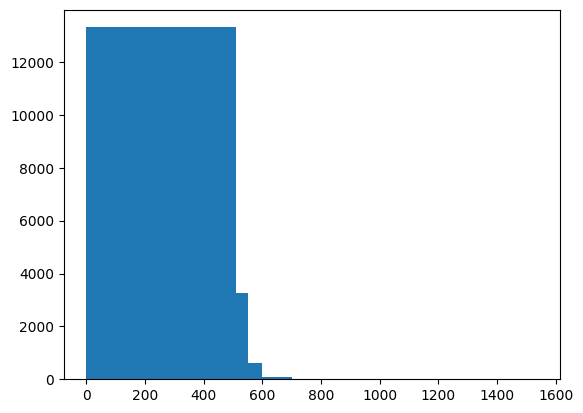

In [149]:
plt.hist(t_len, bins=[0,512,550,600,700,800,1000,1536])

In [156]:
corpus_embeddings = bi_encoder.encode(chapter_content[:2000], convert_to_tensor=True, show_progress_bar=True)


Batches: 100%|██████████| 63/63 [09:35<00:00,  9.13s/it] 


In [157]:
np.save('content_embeddings', corpus_embeddings)

In [159]:
import pickle
with open("chapter_content", "wb") as fp:   #Pickling
    pickle.dump(chapter_content[:2000], fp)